In [23]:
%matplotlib inline

# DTOcean Environmental Module Test - Hydrodynamics

## Import Modules

We need not only the environmental module but the pandas package to enter the data tables.

In [24]:
from IPython.core.display import HTML

In [25]:
import matplotlib
import matplotlib.pylab as plt
import matplotlib.cm as cm
matplotlib.style.use('ggplot')
plt.rcParams['figure.figsize'] = (14.0, 8.0)

In [26]:
import os
import sys
import pandas as pd
import datetime as dt
import numpy as np

In [27]:
sys.path.append('../')

In [28]:
from dtocean_environment.impacts import *
from dtocean_environment.main import HydroStage

In [29]:
def html_dict(x):
    message = "<ul>"
    for name, status in x.iteritems():
        message += "<li>{}: <b>{}</b></li>".format(name, status)
    message += "</ul>"
    return message

In [30]:
def cmap_env(position=None, bit=True):
    '''Colormap for the environmental package
    '''
    colors = [(128,0,128), (255,0,255), (255,0,0), (255,64,0), (255,128,0),
              (255,178,102), (255,255,51), (153,255,153), (255,255,255),
              (204,229,255), (102,178,255), (0,128,255),  (0,0,255)]

    bit_rgb = np.linspace(0,1,256)
    if position == None:
        position = np.linspace(0,1,len(colors))
    else:
        if len(position) != len(colors):
            sys.exit("position length must be the same as colors")
        elif position[0] != 0 or position[-1] != 1:
            sys.exit("position must start with 0 and end with 1")
    if bit:
        for i in range(len(colors)):
            colors[i] = (bit_rgb[colors[i][0]],
                         bit_rgb[colors[i][1]],
                         bit_rgb[colors[i][2]])
    cdict = {'red':[], 'green':[], 'blue':[]}
    for pos, color in zip(position, colors):
        cdict['red'].append((pos, color[0], color[0]))
        cdict['green'].append((pos, color[1], color[1]))
        cdict['blue'].append((pos, color[2], color[2]))
    
    cmap = matplotlib.colors.LinearSegmentedColormap('environment', cdict, 256)
    return cmap


In [31]:
def plot_score(eis, title):

    # Environmental impacts
    
    env_impacts = ["Energy Modification",
                   "Footprint",
                   "Collision Risk",
                   "Collision Risk Vessel",
                   "Chemical Pollution",
                   "Turbidity",
                   "Underwater Noise",
                   "Electric Fields",
                   "Magnetic Fields",
                   "Temperature Modification",
                   "Reef Effect",
                   "Reserve Effect",
                   "Resting Place"]
    
    value=[]
    impact=[]
    confidence=[]
    
    for key in env_impacts:
        if key in eis_dict and eis_dict[key] is not None:
            value.append(eis_dict[key])
            impact.append(key)
            confidence.append(confidence_dict[key])
        else:
            value.append(0)
            impact.append(key)
            confidence.append(0)

    ## if we want to sort the values
    ##value, impact, confidence = zip(*sorted(zip(value, impact, confidence)))

    env_cmap = cmap_env()
    norm = matplotlib.colors.Normalize(-100, 50)
    env_color = env_cmap(norm(value))
    
    fig = plt.figure()

    ax1 = fig.add_subplot(1,1,1)
    x = np.arange(len(value))
    ax1.barh(x, value, align='center', color = env_color)
    ax1.set_xticklabels([])
    ax1.set_yticks(x)
    ax1.set_yticklabels(impact)
    ax1.axvline(0, color='grey')

    for i,v in zip(x, value):
        if v < 0:
            ax1.text(v - 4., i + 0.15 , str(int(round(v))), color = 'black', weight = 'bold')
        elif v > 0:
            ax1.text(v + 1., i + 0.15 , str(int(round(v))), color = 'black', weight = 'bold')
    
    plt.gca().invert_yaxis()
    #plt.grid()
    cmmapable = cm.ScalarMappable(norm, env_cmap)
    cmmapable.set_array(range(-100, 50))
    plt.colorbar(cmmapable, orientation='horizontal')
    plt.xlabel('Environmental Score')

    ax2 = ax1.twinx()
    ax2.barh(x, np.zeros(len(x)), align='center')
    ax2.yaxis.tick_right()
    ax2.set_yticks(x)
    ax2.set_yticklabels(confidence)
    ax2.set_ylabel('Level of confidence')
    
    plt.xlim([-100,50])
    plt.title(title)
    
    plt.show()

In [32]:
def plot_global(geis):

    fig = plt.figure()

    ax1 = fig.add_subplot(1,1,1)

    plt.title('Global Score')
    
    plt.show()

### Define path to data

In [33]:
data_dir = "../dtocean_environment/data/hydrodynamics"
test_data_dir = "../test_data/"

### Define the protected species table

In [34]:
table_path = os.path.join(test_data_dir, "species_protected.csv")
protected_table = pd.read_csv(table_path, index_col=0)

protected_table

,observed
subclass or group,
mysticete,False
dolphinds,False
large odontoncete,False
odontoncete,False
particular habitat,False
fish,False


### Define the table of receptor impact data

In [35]:
table_path = os.path.join(test_data_dir, "species_receptors_test.csv")
receptors_table = pd.read_csv(table_path, index_col=0)

receptors_table

,observed,observed january,observed february,observed march,observed april,observed may,observed june,observed july,observed august,observed september,observed october,observed november,observed december
subclass or group,,,,,,,,,,,,,
Hard substrate benthic habitat,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Soft substrate benthic habitat,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Particular habitat,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Shallow diving birds,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medium diving birds,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Deep diving birds,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Large odontocete_Mysticete,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Odontoncete_dolphinds,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Seals,True,True,True,True,True,False,False,False,False,False,False,False,False


### Set dictionaries of weightings

**Note**: For weightings *None* can be used if no data is known

In [36]:
weighting_dict = {"Energy Modification": "Loose sand",
                  "Collision Risk": None,
                  "Turbidity": None,
                  "Underwater Noise": None,
                  "Reserve Effect": None,
                  "Reef Effect": None,
                  "Resting Place": None}

msg = html_dict(weighting_dict)
HTML(msg)

### Read devices positions for the test

In [37]:
f = open(os.path.join(test_data_dir,"positions.txt"), 'r')
data = np.genfromtxt(f)
x=np.zeros(50)
y=np.zeros(50)

for ii in range(0, 50):
    datatmp=data[ii]
    x[ii]=datatmp[0]
    y[ii]=datatmp[1]

### Set dictionaries of inputs

In [38]:
input_dict = {"Energy Modification"             : 0.3,
              "Coordinates of the Devices"      : [x,y],
              "Size of the Devices"             : 50.,
              "Immersed Height of the Devices"  : 10.,
              "Water Depth"                     : 30.,
              "Current Direction"               : 45.,
              "Initial Turbidity"               : 100.,
              "Measured Turbidity"              : 100.,
              "Initial Noise dB re 1muPa"       : 60.,
              "Measured Noise dB re 1muPa"      : 70.,
              "Fishery Restriction Surface"     : 600000.,
              "Total Surface Area"              : 1000000.,
              "Number of Objects"               : 50,
              "Object Emerged Surface"          : 20.,
              "Surface Area of Underwater Part" : 60.
              }

### Initiate the HydroStage object

In [39]:
hydro_stage = HydroStage(protected_table,
                         receptors_table,
                         weighting_dict)

### Calculate the agregated scores

In [40]:
confidence_dict, eis_dict, recomendations_dict, seasons, global_eis = hydro_stage(input_dict)

message = "<h3>Result</h3><p>Logigram impact scores:</p> {}".format(html_dict(eis_dict))
message += "<p>Logigram confidence levels:</p> {}".format(html_dict(confidence_dict))
message += "<p>Logigram seasonsal scores:</p> {}".format(seasons.to_html())

HTML(message)

,january,february,march,april,may,june,july,august,september,october,november,december
Resting Place,10.007200,10.007200,10.007200,10.007200,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
Collision Risk,-29.945075,-29.945075,-29.945075,-29.945075,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0
Underwater Noise,-74.000000,-74.000000,-74.000000,-74.000000,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0
Reserve Effect,39.200000,39.200000,39.200000,39.200000,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
Reef Effect,10.021600,10.021600,10.021600,10.021600,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0


In [41]:
message = "<p>Global impact scores:</p> {}".format(html_dict(global_eis))

HTML(message)

In [42]:
message = "<p>Recomendations:</p> {}".format(html_dict(recomendations_dict))

HTML(message)

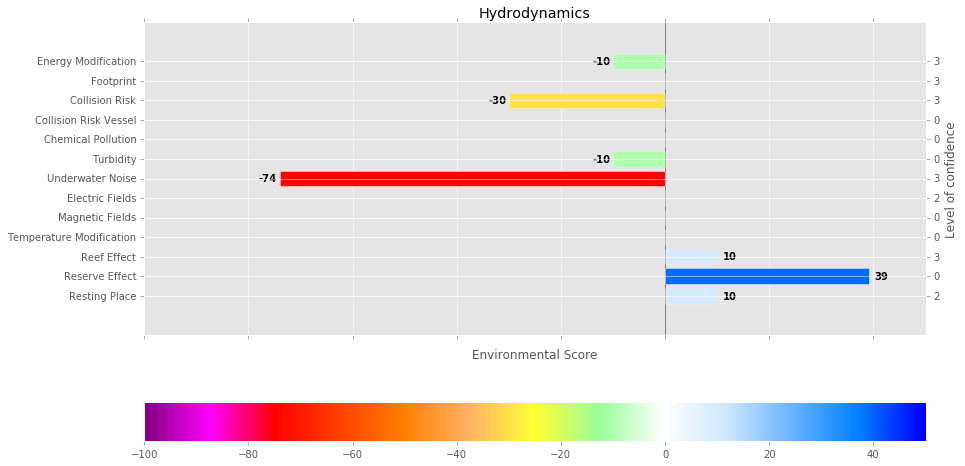

In [43]:
plot_score(eis_dict, 'Hydrodynamics')

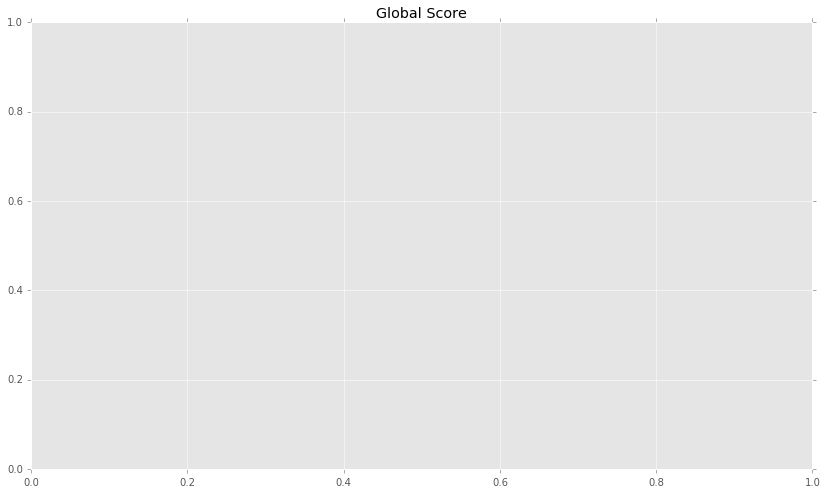

In [44]:
plot_global(global_eis)